# Decentmon data preparation

In [13]:
import pandas as pd

from decmon.constants import *
from decmon.df_utils import *
from decmon.filter import *
from decmon.plotter import *

In [14]:
# FILENAME = "sample_log.txt"
FILENAME = "2022-09-07_12-06-13_output.log"

In [15]:
path = f"{INPUT_DIR}/{FILENAME}"

df = load_simulation_data(path)

In [16]:
strategies_ddf = split_by_dictionary(df, STRATEGIES)

print(f"Strategies: {len(strategies_ddf)}. Formulae:{len(strategies_ddf[0])}")
strategies_df = pd.concat(strategies_ddf, ignore_index=True)
strategies_df

Strategies: 3. Formulae:3041


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy
0,0,1,2,3,1.00,3,"Next (Var ""b"")",{a| |c} ; {a| |c} ; {a| | } ; { | | } ; {a| |...,orchestration
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | |c} ; { |b| } ; { |b|c} ; {a| |c} ; { | |...,orchestration
2,2,1,2,3,1.00,3,"Next (Var ""a"")",{a|b|c} ; {a| |c} ; { |b| } ; {a|b| } ; {a|b|...,orchestration
3,3,1,2,3,1.00,3,"Next (Var ""c"")",{ | |c} ; {a| | } ; { |b|c} ; { | |c} ; {a|b|...,orchestration
4,4,1,2,3,1.00,4,"Glob (Var ""b"")",{a|b| } ; {a| |c} ; {a|b| } ; { |b|c} ; {a| |...,orchestration
...,...,...,...,...,...,...,...,...,...
9118,3036,5,21,79,10.76,1153,"Until (Or (Ev (Next (And (Var ""a"", Var ""c"")))...",{ | | } ; { |b|c} ; { | | } ; { |b| } ; {a| |...,choreography
9119,3037,5,18,51,7.88,1041,"Until (Or (Var ""c"", Next (Until (Var ""b"", Var...",{ | | } ; {a| |c} ; { |b| } ; {a| |c} ; {a|b|...,choreography
9120,3038,5,22,21,2.76,143,"Next (Next (Or (Glob (Var ""a""), Ev (And (Var ...",{a| |c} ; { |b|c} ; { |b|c} ; { | |c} ; { | |...,choreography
9121,3039,5,25,48,5.66,310,"Next (Glob (Until (Until (Var ""b"", Var ""a""), ...",{ | |c} ; {a|b| } ; {a| |c} ; {a| | } ; {a| |...,choreography


In [17]:
merged_metrics = extract_metrics(strategies_df)

(trace_length, num_mess, size_mess, nb_progressions) = merged_metrics

merged_metrics.max()

formula_id             3040
strategy      orchestration
value               47303.0
metric            trace_len
dtype: object

## Formula Encoding

In [28]:
f_ops = extract_ops(strategies_df)
f_ops

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,11,-2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,-3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,-3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,-2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9118,10,5,12,11.0,4.0,-1.0,-3.0,0.0,0.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9119,10,5,-3,11.0,10.0,-2.0,-1.0,0.0,4.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9120,11,11,5,13.0,-1.0,0.0,12.0,4.0,-3.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9121,11,13,10,10.0,-2.0,-1.0,6.0,-2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting

<AxesSubplot:>

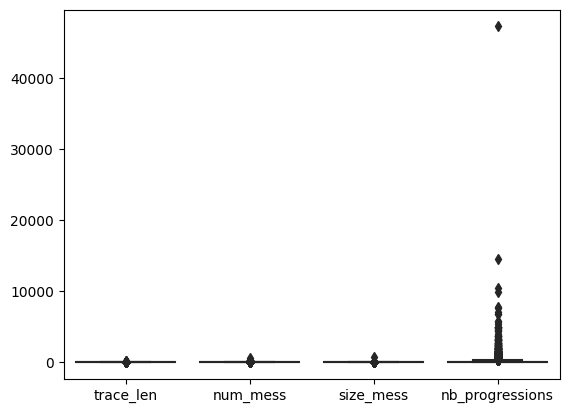

In [19]:
to_plot = strategies_df.drop(['formula_id', 'x'], axis=1)
plot_boxplot(to_plot)

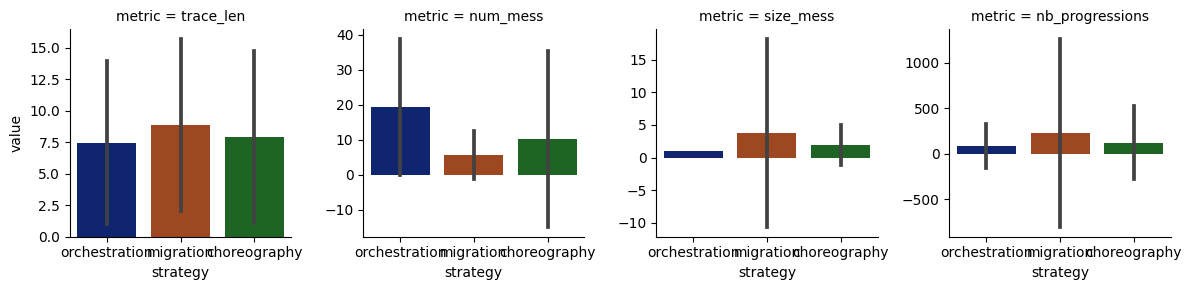

In [20]:
grid_plot = plot_grid_barplots(merged_metrics, grid_cell_field= 'metric',
          y_axis = 'value', x_axis = 'strategy',
          order = ['orchestration', 'migration', 'choreography'])

grid_plot.savefig("output/out.png")

In [21]:
ndf = merged_metrics.copy()
ndf['strategy'] = ndf['strategy'].str.replace("^cent_", "1", regex=True)
ndf['strategy'] = ndf['strategy'].str.replace("^decent_", "2", regex=True)
ndf['strategy'] = ndf['strategy'].str.replace("^odecent_", "3", regex=True)
ndf

,formula_id,strategy,value,metric
0,0,orchestration,2.0,trace_len
1,1,orchestration,2.0,trace_len
2,2,orchestration,2.0,trace_len
3,3,orchestration,2.0,trace_len
4,4,orchestration,2.0,trace_len
...,...,...,...,...
9118,3036,choreography,1153.0,nb_progressions
9119,3037,choreography,1041.0,nb_progressions
9120,3038,choreography,143.0,nb_progressions
9121,3039,choreography,310.0,nb_progressions


In [22]:
expanded_df = strategies_df.merge(f_ops, left_index=True, right_index=True)
expanded_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,0,...,161,162,163,164,165,166,167,168,169,170
0,0,1,2,3,1.00,3,"Next (Var ""b"")",{a| |c} ; {a| |c} ; {a| | } ; { | | } ; {a| |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | |c} ; { |b| } ; { |b|c} ; {a| |c} ; { | |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,3,1.00,3,"Next (Var ""a"")",{a|b|c} ; {a| |c} ; { |b| } ; {a|b| } ; {a|b|...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,3,1.00,3,"Next (Var ""c"")",{ | |c} ; {a| | } ; { |b|c} ; { | |c} ; {a|b|...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,3,1.00,4,"Glob (Var ""b"")",{a|b| } ; {a| |c} ; {a|b| } ; { |b|c} ; {a| |...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9118,3036,5,21,79,10.76,1153,"Until (Or (Ev (Next (And (Var ""a"", Var ""c"")))...",{ | | } ; { |b|c} ; { | | } ; { |b| } ; {a| |...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9119,3037,5,18,51,7.88,1041,"Until (Or (Var ""c"", Next (Until (Var ""b"", Var...",{ | | } ; {a| |c} ; { |b| } ; {a| |c} ; {a|b|...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9120,3038,5,22,21,2.76,143,"Next (Next (Or (Glob (Var ""a""), Ev (And (Var ...",{a| |c} ; { |b|c} ; { |b|c} ; { | |c} ; { | |...,choreography,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9121,3039,5,25,48,5.66,310,"Next (Glob (Until (Until (Var ""b"", Var ""a""), ...",{ | |c} ; {a|b| } ; {a| |c} ; {a| | } ; {a| |...,choreography,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
expanded_df.strategy = pd.Categorical(expanded_df.strategy)
expanded_df['strategy_id'] = expanded_df.strategy.cat.codes
expanded_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,0,...,162,163,164,165,166,167,168,169,170,strategy_id
0,0,1,2,3,1.00,3,"Next (Var ""b"")",{a| |c} ; {a| |c} ; {a| | } ; { | | } ; {a| |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | |c} ; { |b| } ; { |b|c} ; {a| |c} ; { | |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2,1,2,3,1.00,3,"Next (Var ""a"")",{a|b|c} ; {a| |c} ; { |b| } ; {a|b| } ; {a|b|...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,3,1,2,3,1.00,3,"Next (Var ""c"")",{ | |c} ; {a| | } ; { |b|c} ; { | |c} ; {a|b|...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,4,1,2,3,1.00,4,"Glob (Var ""b"")",{a|b| } ; {a| |c} ; {a|b| } ; { |b|c} ; {a| |...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9118,3036,5,21,79,10.76,1153,"Until (Or (Ev (Next (And (Var ""a"", Var ""c"")))...",{ | | } ; { |b|c} ; { | | } ; { |b| } ; {a| |...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9119,3037,5,18,51,7.88,1041,"Until (Or (Var ""c"", Next (Until (Var ""b"", Var...",{ | | } ; {a| |c} ; { |b| } ; {a| |c} ; {a|b|...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9120,3038,5,22,21,2.76,143,"Next (Next (Or (Glob (Var ""a""), Ev (And (Var ...",{a| |c} ; { |b|c} ; { |b|c} ; { | |c} ; { | |...,choreography,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9121,3039,5,25,48,5.66,310,"Next (Glob (Until (Until (Var ""b"", Var ""a""), ...",{ | |c} ; {a|b| } ; {a| |c} ; {a| | } ; {a| |...,choreography,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [24]:
# Selecting the optimal value
# def select_optimal_values(df: DataFrame, metric: str) -> pd.DataFrame:
#     filter = df.groupby(['formula_id', 'trace']).min()['metric'].values
#     # df[]

In [25]:
gsdf = expanded_df[strategies_df['nb_progressions'].isin(expanded_df.groupby(['formula_id', 'trace']).min()['nb_progressions'].values)]
gsdf1 = expanded_df.sort_values(['nb_progressions'],ascending=True).set_index(['formula_id', 'trace'])
# gsdf1

#idx = (gsdf1['nb_progressions'].min().values.tolist())
#gsdf2 = gsdf1.loc[gsdf1['nb_progressions'].min()]
gsdf2 = gsdf1[gsdf1.groupby(['formula_id', 'trace'])['nb_progressions'].transform('first') != gsdf1['nb_progressions']]
gsdf2

/var/folders/p7/3_3g7g_x7t9dc251z7lwpqqm0000gn/T/ipykernel_50546/2319353111.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  gsdf = expanded_df[strategies_df['nb_progressions'].isin(expanded_df.groupby(['formula_id', 'trace']).min()['nb_progressions'].values)]


x  trace_len  \
formula_id trace                                                              
179         {a| | } ; { | |c} ; { | | } ; { | | } ; { | | ...  1          3   
335         { | | } ; {a| | } ; {a|b|c} ; { | |c} ; {a|b|c...  1          4   
438         { |b|c} ; {a| | } ; {a|b| } ; {a|b|c} ; { |b|c...  1          3   
337         {a|b| } ; { | | } ; {a| |c} ; { | |c} ; {a| | ...  1          3   
244         { |b| } ; {a| | } ; {a|b|c} ; {a|b|c} ; {a|b| ...  1          4   
...                                                           ..        ...   
2672        {a|b|c} ; {a|b| } ; {a| |c} ; {a|b| } ; {a|b| ...  4         50   
3021        { |b|c} ; { |b|c} ; {a|b|c} ; { |b|c} ; { |b| ...  5         19   
2854        {a| | } ; { | |c} ; {a|b| } ; {a|b|c} ; { | | ...  4        130   
            {a| | } ; { | |c} ; {a|b| } ; {a|b|c} ; { | | ...  4        133   
3021        { |b|c} ; { |b|c} ; {a|b|c} ; { |b|c} ; { |b| ...  5         18   

                                                               num_mess  \
formula_id trace                                                          
179         {a| | } ; { | |c} ; { | | } ; { | | } ; { | | ...         2   
335         { | | } ; {a| | } ; {a|b|c} ; { | |c} ; {a|b|c...         2   
438         { |b|c} ; {a| | } ; {a|b| } ; {a|b|c} ; { |b|c...         2   
337         {a|b| } ; { | | } ; {a| |c} ; { | |c} ; {a| | ...         2   
244         { |b| } ; {a| | } ; {a|b|c} ; {a|b|c} ; {a|b| ...         2   
...                                                                 ...   
2672        {a|b|c} ; {a|b| } ; {a| |c} ; {a|b| } ; {a|b| ...        46   
3021        { |b|c} ; { |b|c} ; {a|b|c} ; { |b|c} ; { |b| ...       155   
2854        {a| | } ; { | |c} ; {a|b| } ; {a|b|c} ; { | | ...       641   
            {a| | } ; { | |c} ; {a|b| } ; {a|b|c} ; { | | ...       104   
3021        { |b|c} ; { |b|c} ; {a|b|c} ; { |b|c} ; { |b| ...        33   

                                                               size_mess  \
formula_id trace                                                           
179         {a| | } ; { | |c} ; { | | } ; { | | } ; { | | ...       1.66   
335         { | | } ; {a| | } ; {a|b|c} ; { | |c} ; {a|b|c...       1.11   
438         { |b|c} ; {a| | } ; {a|b| } ; {a|b|c} ; { |b|c...       1.66   
337         {a|b| } ; { | | } ; {a| |c} ; { | |c} ; {a| | ...       1.66   
244         { |b| } ; {a| | } ; {a|b|c} ; {a|b|c} ; {a|b| ...       1.11   
...                                                                  ...   
2672        {a|b|c} ; {a|b| } ; {a| |c} ; {a|b| } ; {a|b| ...      38.85   
3021        { |b|c} ; { |b|c} ; {a|b|c} ; { |b|c} ; { |b| ...      22.75   
2854        {a| | } ; { | |c} ; {a|b| } ; {a|b|c} ; { | | ...      18.14   
            {a| | } ; { | |c} ; {a|b| } ; {a|b|c} ; { | | ...      24.56   
3021        { |b|c} ; { |b|c} ; {a|b|c} ; { |b|c} ; { |b| ...     695.74   

                                                               nb_progressions  \
formula_id trace                                                                 
179         {a| | } ; { | |c} ; { | | } ; { | | } ; { | | ...                8   
335         { | | } ; {a| | } ; {a|b|c} ; { | |c} ; {a|b|c...                8   
438         { |b|c} ; {a| | } ; {a|b| } ; {a|b|c} ; { |b|c...                8   
337         {a|b| } ; { | | } ; {a| |c} ; { | |c} ; {a| | ...                8   
244         { |b| } ; {a| | } ; {a|b|c} ; {a|b|c} ; {a|b| ...                8   
...                                                                        ...   
2672        {a|b|c} ; {a|b| } ; {a| |c} ; {a|b| } ; {a|b| ...             7840   
3021        { |b|c} ; { |b|c} ; {a|b|c} ; { |b|c} ; { |b| ...             9903   
2854        {a| | } ; { | |c} ; {a|b| } ; {a|b|c} ; { | | ...            10525   
            {a| | } ; { | |c} ; {a|b| } ; {a|b|c} ; { | | ...            14483   
3021        { |b|c} ; { |b|c} ; {a|b|c} ; { |b|c} ; { |b| ...            47303   

   

In [26]:
expanded_df2 = gsdf2.reset_index()
expanded_df2

,formula_id,trace,x,trace_len,num_mess,size_mess,nb_progressions,formula,strategy,0,...,162,163,164,165,166,167,168,169,170,strategy_id
0,179,{a| | } ; { | |c} ; { | | } ; { | | } ; { | |...,1,3,2,1.66,8,"Glob (Var ""a"")",migration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,335,{ | | } ; {a| | } ; {a|b|c} ; { | |c} ; {a|b|...,1,4,2,1.11,8,"Ev (Var ""b"")",migration,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,438,{ |b|c} ; {a| | } ; {a|b| } ; {a|b|c} ; { |b|...,1,3,2,1.66,8,"Glob (Var ""c"")",migration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,337,{a|b| } ; { | | } ; {a| |c} ; { | |c} ; {a| |...,1,3,2,1.66,8,"Glob (Var ""a"")",migration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,244,{ |b| } ; {a| | } ; {a|b|c} ; {a|b|c} ; {a|b|...,1,4,2,1.11,8,"Ev (Var ""c"")",migration,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,2672,{a|b|c} ; {a|b| } ; {a| |c} ; {a|b| } ; {a|b|...,4,50,46,38.85,7840,"Until (Until (Var ""c"", Or (Next (Var ""c""), Va...",migration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3963,3021,{ |b|c} ; { |b|c} ; {a|b|c} ; { |b|c} ; { |b|...,5,19,155,22.75,9903,"Until (And (Next (Until (Var ""b"", Var ""a"")), ...",choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3964,2854,{a| | } ; { | |c} ; {a|b| } ; {a|b|c} ; { | |...,4,130,641,18.14,10525,"Glob (Until (Until (Var ""c"", Var ""a""), Until ...",choreography,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3965,2854,{a| | } ; { | |c} ; {a|b| } ; {a|b|c} ; { | |...,4,133,104,24.56,14483,"Glob (Until (Until (Var ""c"", Var ""a""), Until ...",migration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [27]:
# f_ops.hist(column='total_ops')
# f_ops['total_ops'].value_counts()
